In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py

In [2]:
%matplotlib notebook

In [3]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [4]:
%reload_ext autoreload
%autoreload 2

In [5]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework
from likelihood_calculator import auxiliary_functions as aux
gfw = GravityFramework.GravityFramework()

In [6]:
gfw = GravityFramework.GravityFramework()

### Load data

In [7]:
foldername = r'/data/new_trap/20200210/Bead2/Discharge/'
bdf_discharge = load_dir(dirname=foldername)

57  files in folder
57  files loaded


In [8]:
bb = bdf_discharge[0]
response_z = [np.std(bb.response_at_freq('z',drive_freq=151)) for bb in bdf_discharge]
response_x = [np.std(bb.response_at_freq('x',drive_freq=151)) for bb in bdf_discharge]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


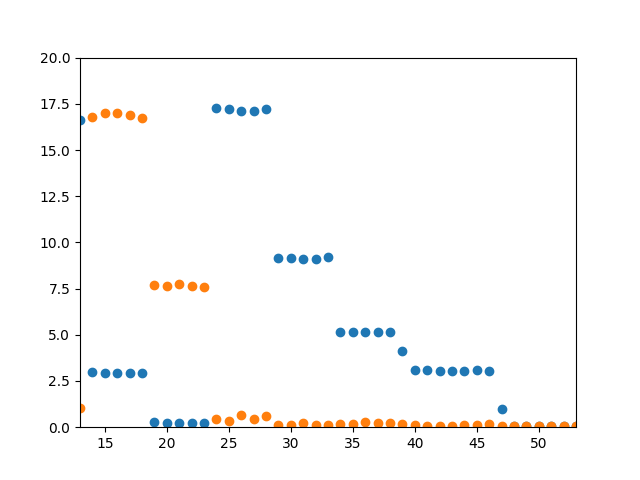

4460.518682913541


In [9]:
_, ax = plt.subplots()
ax.scatter(range(len(response_x)), response_z/response_z[47])
ax.scatter(range(len(response_x)), response_x/response_x[15]*17)
ax.set(xlim=(13,53), ylim=(0,20))
print(response_x[48])

In [10]:
bdf_z = bdf_discharge[40:46]
bdf_x = bdf_discharge[14:19]
m1s_z = gfw.build_z_response(bdf_z, drive_freq=151,charges=3, bandwidth=1, decimate=10, include_sigma=True)
m1s_x = gfw.build_x_response(bdf_x, drive_freq=151,charges=17, bandwidth=1)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
Z2-amplitude:  1.07e+03
reduced chi2:  7.911945610906001
***************************************************
Z2-amplitude:  1.06e+03
reduced chi2:  7.666345824446441
***************************************************
Z2-amplitude:  1.05e+03
reduced chi2:  7.6955109990331545
***************************************************
Z2-amplitude:  1.04e+03
reduced chi2:  7.706021260335391
***************************************************
Z2-amplitude:  1.05e+03
reduced chi2:  7.726927610265385
***************************************************
Z2-amplitude:  1.05e+03
reduced chi2:  7.705681054763986
Z2 response (amplitude): 1052.9094942729869
***************************************************
X2-amplitude:  9.32e+01
reduced chi2:  8.871076115573855
***************************************************
X2-amplitude:  9.45e+01
reduced chi2:  8.633933863134763
***************************************************
X2-amplitude:  9.44e+01
reduced

<IPython.core.display.Javascript object>


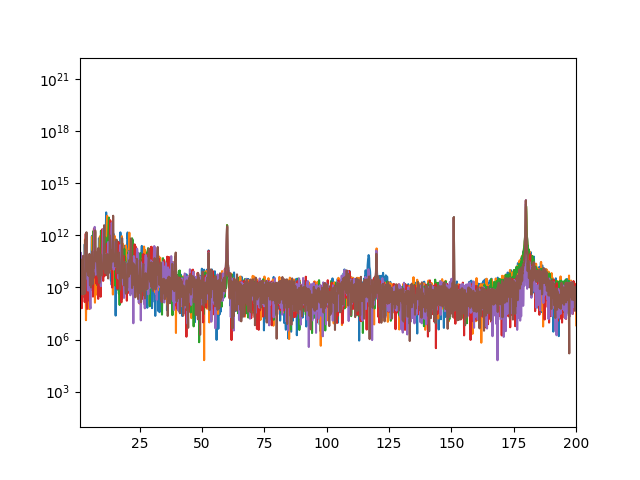

[(1, 200)]

In [11]:
_,ax = plt.subplots()
[ax.semilogy(*bb.psd('z')) for bb in bdf_z]
ax.set(xlim=(1,200))

### Transfer function

In [12]:
fname = r'/data/new_trap/20200210/Bead2/TransFunc/TransFunc_X_3.h5'
tf_x = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/data/new_trap/20200210/Bead2/TransFunc/TransFunc_Y_3.h5'
tf_y = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/data/new_trap/20200210/Bead2/TransFunc/TransFunc_Z_3.h5'
tf_z = BeadDataFile.BeadDataFile(fname=fname)
tf_list = [tf_x, tf_y, tf_z]

No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data


<IPython.core.display.Javascript object>


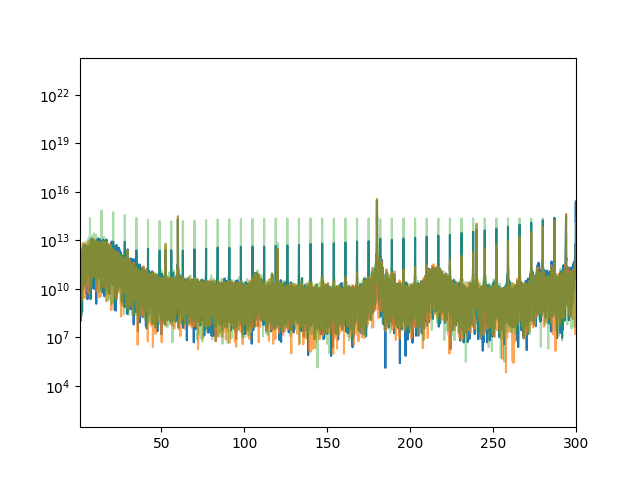

[(1, 300)]

In [189]:
_,ax = plt.subplots()
alphas = [1,0.7,0.4]
[ax.semilogy(*bb.psd('z'), alpha=alpha_) for bb,alpha_ in zip(tf_list,alphas)]
ax.set(xlim=(1,300))

<IPython.core.display.Javascript object>


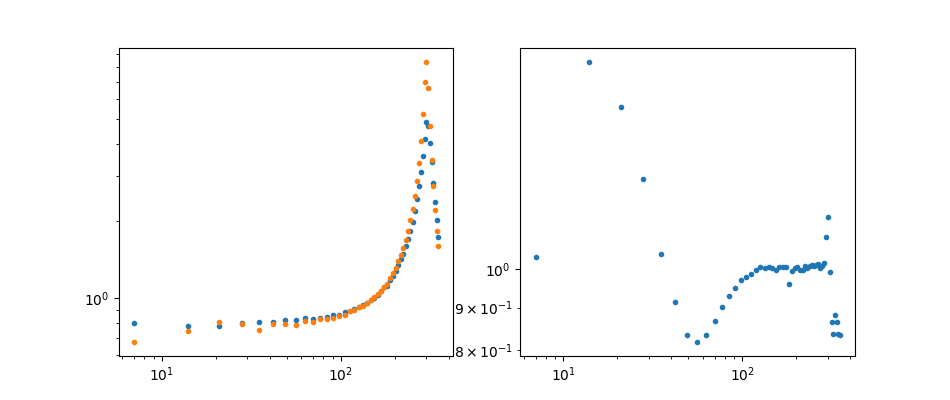

In [13]:
gfw.build_transfer_function(tf_list, plot=True)

In [190]:
# foldername = r'/data/new_trap/20200107/Bead3/InitialTest/'
foldername = r'/data/new_trap/20200210/Bead2/Shaking/Shaking384/'
foldername = r'/data/new_trap/20200210/Bead2/Shaking/Stability384/'
# foldername = r'/data/new_trap/20200210/Bead2/Shaking/Shaking_spin/'
datasets_num = 1000
data_bdfs = load_dir(foldername, file_prefix='Stability0', start_file=0, max_file=datasets_num)

500  files in folder
500  files loaded


In [196]:
gfw.BDFs = data_bdfs

<IPython.core.display.Javascript object>


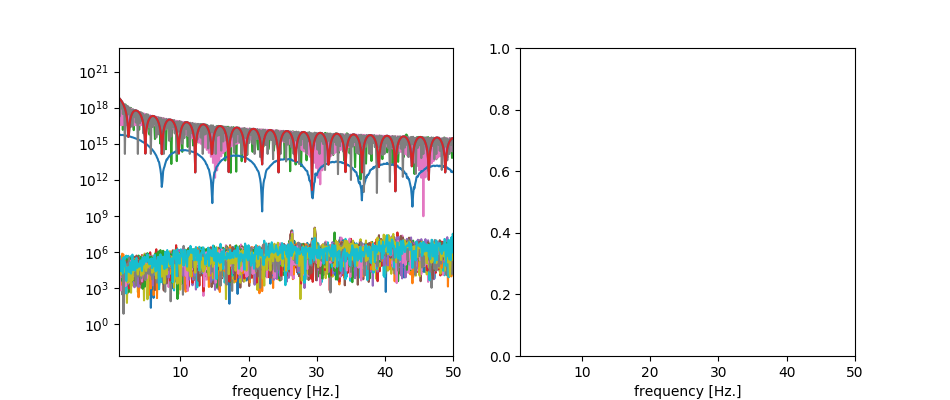

[(1, 50), Text(0.5, 0, 'frequency [Hz.]')]

In [192]:
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True)
for i,bb in enumerate(data_bdfs[:500:10]):
    ax[0].semilogy(*bb.psd2('z'))
ax[0].set(xlim=(1,50),xlabel='frequency [Hz.]')

for i,bb in enumerate(data_bdfs[500::10]):
    ax[1].semilogy(*bb.psd2('z'))
ax[1].set(xlim=(1,50),xlabel='frequency [Hz.]')

In [193]:
gfw.build_noise_array(sideband_freq=20, bandwidth=2)
# gfw.BDFs = data_bdfs
gfw.build_noise_array_z(sideband_freq=20, bandwidth=2)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  5433.282316603112
x3 noise rms:  22963.08597278101
z2 noise level:  131848.25658409364  std:  532016.4508334389


In [21]:
m1s_z5 = gfw.build_z_response(bdf_z, drive_freq=151,charges=3, bandwidth=2, decimate=100, include_sigma=True)

***************************************************
Z2-amplitude:  8.71e+02
reduced chi2:  25.55625068657886
***************************************************
Z2-amplitude:  8.41e+02
reduced chi2:  25.55625081016888
***************************************************
Z2-amplitude:  8.30e+02
reduced chi2:  25.55625077746521
***************************************************
Z2-amplitude:  8.18e+02
reduced chi2:  25.556250791365
***************************************************
Z2-amplitude:  8.30e+02
reduced chi2:  25.556250773239167
***************************************************
Z2-amplitude:  8.40e+02
reduced chi2:  25.55625074099152
Z2 response (amplitude): 838.5075352952563


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [283]:
np.mean([m1_.values[3] for m1_ in m1s_z5]), np.std([m1_.values[3] for m1_ in m1s_z5])

(152.85431011865384, 32.41170236769793)

In [50]:
gfw.scale_Z2, gfw.tf_ffts[2]

(2049781582428802.0,
 array([1.13370116, 1.30761381, 1.12879453, 1.30412491, 0.67349737,
        0.92065544, 0.78698129, 0.65996182, 0.90722819, 0.80740429,
        0.81568378, 0.88174077, 0.9975739 , 0.9638038 , 0.94236515,
        1.00410001, 0.97825629, 1.01369981, 1.01159055, 0.98463149,
        0.9941386 , 1.00439605, 1.00477528, 1.03610635, 0.98737038,
        1.01430075, 1.03989577, 1.03819126, 1.05205843, 1.03848771,
        1.08148211, 1.04797809, 1.0148529 , 0.97768474, 0.94334023,
        0.91603735, 0.85543115, 0.73856123, 0.64484303, 0.94733709,
        1.7493425 , 1.89980454, 1.91967978, 1.62809113, 1.45505277,
        1.27743966, 1.30707363, 1.1933053 , 1.10434401, 1.09722203]))

In [38]:
gfw.fsamp

5000

### profile likelihood

In [203]:
fit_kwargs = {'alpha': 0, 'phase': 0, 'sigma': 17, 'error_alpha': 0.01, 'error_phase': 1, 'error_sigma': 1,
              'errordef': 1,
              'limit_alpha': [-100, 100], 'limit_phase': [-10,10], 'limit_sigma': [0,None],
              'fix_alpha': True, 'fix_phase': True, 'fix_sigma': False, 'print_level': 0}

fit_kwargs2 = {'alpha': 0, 'phase': 0, 'sigma': 17, 'error_alpha': 0.01, 'error_phase': 1, 'error_sigma': 1,
              'errordef': 1,
              'limit_alpha': [-100, 100], 'limit_phase': [-5,5], 'limit_sigma': [0,None],
              'fix_alpha': False, 'fix_phase': False, 'fix_sigma': False, 'print_level': 0}
min_18_z_noise = []
min_18_z_denom = []
datasets_num = 1000
bandwidth = 2
center_freq = 18
for i,bb in enumerate(gfw.BDFs):
    print(i,'/',datasets_num) 
    min_18_z_noise.append(gfw.get_alpha_mle_pl(bdf=bb, center_freq=center_freq, noise_freq=center_freq+bandwidth, 
                                             bandwidth=bandwidth, decimate=100, direction1='z',
                          x_focous=389.0, frequency=3, lambda_par=0.0001, height=6e-6, suppress_print=False,
                          **fit_kwargs2)[2])

0 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.37e-03
sigma mle:  1.49e+01
reduced chi2:  0.1025484577427509
1 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -2.76e-03
sigma mle:  1.76e+01
reduced chi2:  0.10778527309453002
2 / 1000
Separation (face to face)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
alpha mle:  8.04e-03
sigma mle:  1.80e+01
reduced chi2:  0.1084183518553455
6 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  4.93e-03
sigma mle:  1.57e+01
reduced chi2:  0.10402277763680512
7 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***********************************

***************************************************
alpha mle:  1.27e-03
sigma mle:  1.61e+01
reduced chi2:  0.10496012451764615
24 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -8.10e-03
sigma mle:  1.59e+01
reduced chi2:  0.10461854908087671
25 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*******************************

***************************************************
alpha mle:  -3.54e-03
sigma mle:  1.51e+01
reduced chi2:  0.10283677313193623
42 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -1.83e-04
sigma mle:  1.64e+01
reduced chi2:  0.10552923072992586
43 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.43e-03
sigma mle:  2.50e+01
reduced chi2:  0.11903951438831036
60 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  3.16e-03
sigma mle:  2.26e+01
reduced chi2:  0.11582095198301237
61 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2

***************************************************
alpha mle:  -4.14e-03
sigma mle:  1.63e+01
reduced chi2:  0.1053764757460083
82 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -3.61e-03
sigma mle:  1.59e+01
reduced chi2:  0.10461018657681216
83 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*******************************

***************************************************
alpha mle:  -1.83e-03
sigma mle:  1.99e+01
reduced chi2:  0.11174315380144441
100 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -8.79e-03
sigma mle:  1.96e+01
reduced chi2:  0.11115770796585121
101 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  -8.54e+01
sigma mle:  4.89e+05
reduced chi2:  0.7166491743297366
117 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  9.90e+01
sigma mle:  3.84e+06
reduced chi2:  0.5011530913248732
118 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*******************************

reduced chi2:  0.10962077865457637
137 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -1.22e-02
sigma mle:  1.63e+01
reduced chi2:  0.10536551229762038
138 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  3.80e-03
sigma mle:  1.50e+01
reduced chi2:  0.102648966271

***************************************************
alpha mle:  3.95e-03
sigma mle:  1.76e+01
reduced chi2:  0.10769567996922215
155 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -3.14e-03
sigma mle:  1.89e+01
reduced chi2:  0.11005563149868029
156 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  3.78e-03
sigma mle:  2.25e+01
reduced chi2:  0.11565994297077607
175 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  3.65e-03
sigma mle:  1.84e+01
reduced chi2:  0.10923531678239376
176 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

***************************************************
alpha mle:  4.30e-03
sigma mle:  1.67e+01
reduced chi2:  0.10607568485949591
192 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -3.64e-03
sigma mle:  1.81e+01
reduced chi2:  0.10874700487992199
193 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  3.52e-03
sigma mle:  1.94e+01
reduced chi2:  0.11093750700695126
210 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  7.13e-03
sigma mle:  2.01e+01
reduced chi2:  0.11199211022302645
211 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

***************************************************
alpha mle:  4.64e-03
sigma mle:  1.50e+01
reduced chi2:  0.10264542756968092
230 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -8.96e-04
sigma mle:  1.48e+01
reduced chi2:  0.10212546318498182
231 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  -1.41e-02
sigma mle:  1.78e+01
reduced chi2:  0.1080883810721809
247 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.47e-03
sigma mle:  1.67e+01
reduced chi2:  0.10605882092600889
248 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

***************************************************
alpha mle:  -9.82e-03
sigma mle:  1.70e+01
reduced chi2:  0.10672088019566704
264 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -6.15e-03
sigma mle:  1.58e+01
reduced chi2:  0.10435950452546074
265 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  5.49e-03
sigma mle:  2.47e+01
reduced chi2:  0.1181710399243213
284 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  6.67e-03
sigma mle:  2.62e+01
reduced chi2:  0.12053222036704339
285 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*******************************

***************************************************
alpha mle:  -1.76e-03
sigma mle:  1.58e+01
reduced chi2:  0.10434539078296486
303 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -2.06e-03
sigma mle:  1.74e+01
reduced chi2:  0.10738004916419001
304 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

***************************************************
alpha mle:  -6.74e-03
sigma mle:  1.34e+01
reduced chi2:  0.09902993088490941
325 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  4.51e-03
sigma mle:  1.60e+01
reduced chi2:  0.10469252451214345
326 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  -4.44e-03
sigma mle:  1.81e+01
reduced chi2:  0.10872049401019851
345 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -1.05e-02
sigma mle:  2.48e+01
reduced chi2:  0.11876296845694649
346 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
****************************

Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -5.13e-03
sigma mle:  1.61e+01
reduced chi2:  0.10494238461830505
366 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -4.94e-03
sigma mle:  1.85e+01
reduced chi2:  0.10937266572597777
367 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not

***************************************************
alpha mle:  6.71e-04
sigma mle:  1.65e+01
reduced chi2:  0.10575541456205105
388 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  3.90e-03
sigma mle:  1.59e+01
reduced chi2:  0.10466372023730157
389 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
******************************

***************************************************
alpha mle:  2.64e-03
sigma mle:  1.56e+01
reduced chi2:  0.10399740216977793
406 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -4.37e-03
sigma mle:  1.55e+01
reduced chi2:  0.10378087193805592
407 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  -7.33e-03
sigma mle:  2.74e+01
reduced chi2:  0.12196851532820897
427 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  4.78e-03
sigma mle:  2.55e+01
reduced chi2:  0.11964530759610296
428 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -5.06e-03
sigma mle:  1.47e+01
reduced chi2:  0.10205504048236547
445 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -7.45e-03
sigma mle:  1.67e+01
reduced chi2:  0.10608590238770209
446 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not

***************************************************
alpha mle:  -4.17e-03
sigma mle:  1.82e+01
reduced chi2:  0.10884771258060076
462 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  4.40e-03
sigma mle:  1.79e+01
reduced chi2:  0.10821573822331065
463 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

***************************************************
alpha mle:  2.76e-03
sigma mle:  1.82e+01
reduced chi2:  0.10889470333327682
484 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  -4.49e-03
sigma mle:  1.98e+01
reduced chi2:  0.11158321570270216
485 / 1000
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*****************************

In [204]:
m_18_alpha_1 = [m1_.values[0] for m1_ in min_18_z_1]
m_18_sigma_1 = [m1_.values[2] for m1_ in min_18_z_1]

m_18_alpha_2 = [m1_.values[0] for m1_ in min_18_z_2]
m_18_sigma_2 = [m1_.values[2] for m1_ in min_18_z_2]

m_18_alpha_3 = [m1_.values[0] for m1_ in min_18_z_3]
m_18_sigma_3 = [m1_.values[2] for m1_ in min_18_z_3]

m_18_alpha_4 = [m1_.values[0] for m1_ in min_18_z_4]
m_18_sigma_4 = [m1_.values[2] for m1_ in min_18_z_4]

m_18_alpha_5 = [m1_.values[0] for m1_ in min_18_z_5]
m_18_sigma_5 = [m1_.values[2] for m1_ in min_18_z_5]

m_18_alpha_noise_5 = [m1_.values[0] for m1_ in min_18_z_noise_5]
m_18_sigma_noise_5 = [m1_.values[2] for m1_ in min_18_z_noise_5]

m_18_alpha_noise = [m1_.values[0] for m1_ in min_18_z_noise]
m_18_sigma_noise = [m1_.values[2] for m1_ in min_18_z_noise]

m_18_alpha_5_x = [m1_.values[0] for m1_ in min_18_x_5]
m_18_sigma_5_x = [m1_.values[2] for m1_ in min_18_x_5]

m_18_alpha = m_18_alpha_1+m_18_alpha_2+m_18_alpha_3+m_18_alpha_4+m_18_alpha_5
m_18_sigma = m_18_sigma_1+m_18_sigma_2+m_18_sigma_3+m_18_sigma_4+m_18_sigma_5

In [129]:
m_18_alpha_filtered = [val for i,val in enumerate(m_18_alpha) if m_18_sigma[i]<50]
N_data = len(m_18_alpha_filtered)

<IPython.core.display.Javascript object>


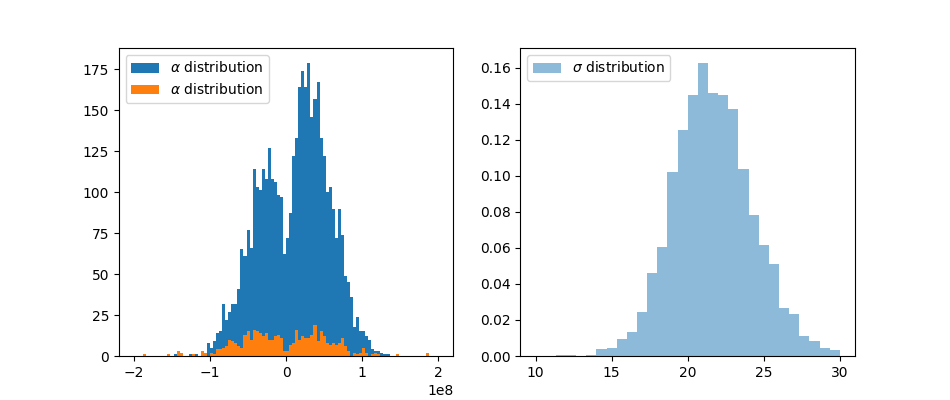

6th hsrmonic mean:  0.0010951637756895234  error:  6.808560677895646e-05
estimated limit:  1.36e+06


/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


In [205]:
_, ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].hist(np.array((m_18_alpha_filtered))*1e10, range=(-0.02*1e10,0.02*1e10), bins=100, label=r'$\alpha$ distribution')
ax[0].hist(np.array((m_18_alpha_noise))*1e10, range=(-0.02*1e10,0.02*1e10), bins=100, label=r'$\alpha$ distribution')
ax[1].hist(m_18_sigma,range=(10,30),bins=30,alpha=0.5,normed=True, label=r'$\sigma$ distribution')
[a.legend() for a in ax]
print('6th hsrmonic mean: ',np.mean(m_18_alpha_filtered), ' error: ', np.std(m_18_alpha_filtered)/np.sqrt(N_data))
print('estimated limit: ', format(np.std((m_18_alpha_filtered))/np.sqrt(N_data)*2*1e10,"5.2e"))

<IPython.core.display.Javascript object>


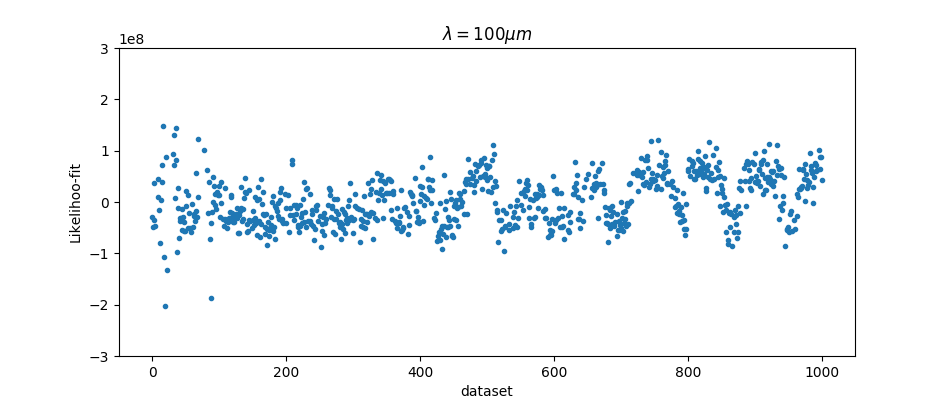

[(-300000000.0, 300000000.0)]

In [215]:
_, ax = plt.subplots(figsize=(9.5,4))
# ax.plot(range(len(m_18_alpha_1)),np.array(m_18_alpha_1)*1e10,'.')
# ax.plot(range(len(m_18_alpha_2)),np.array(m_18_alpha_2)*1e10,'.')
ax.plot(range(len(m_18_alpha_3)),np.array(m_18_alpha_3)*1e10,'.')
# ax.plot(range(len(m_18_alpha_3)),np.array(m_18_alpha_4)*1e10,'.')
# ax.plot(range(len(m_18_alpha_3)),np.array(m_18_alpha_5)*1e10,'.')
# ax.plot(range(len(m_18_alpha_noise)),np.array(m_18_alpha_noise)*1e10,'.')
ax.set(xlabel='dataset', ylabel=r'Likelihoo-fit', title=r'$\lambda=100 \mu m $')
ax.set(ylim=(-3e8,3e8))

<IPython.core.display.Javascript object>


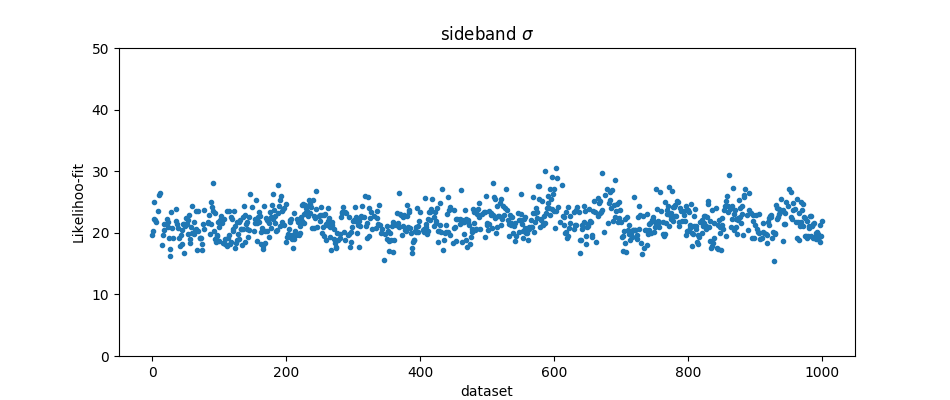

[(0, 50)]

In [171]:
_, ax = plt.subplots(figsize=(9.5,4))
# ax.plot(range(len(m_18_alpha_1)),np.array(m_18_sigma_1),'.')
# ax.plot(range(len(m_18_alpha_2)),np.array(m_18_sigma_2),'.')
# ax.plot(range(len(m_18_alpha_3)),np.array(m_18_sigma_3),'.')
# ax.plot(range(len(m_18_alpha_3)),np.array(m_18_sigma_4),'.')
ax.plot(range(len(m_18_alpha_3)),np.array(m_18_sigma_5),'.')
ax.set(xlabel='dataset', ylabel=r'Likelihoo-fit', title=r'sideband $\sigma$')
ax.set(ylim=(0,50))

<IPython.core.display.Javascript object>


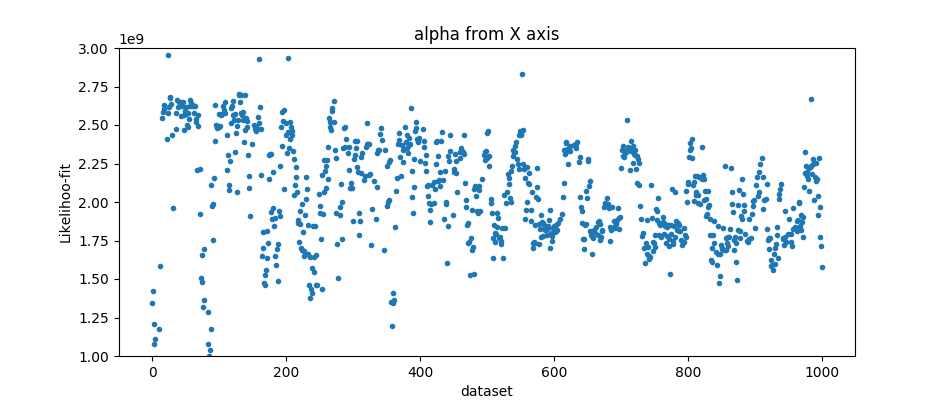

[(1000000000.0, 3000000000.0)]

In [138]:
_, ax = plt.subplots(figsize=(9.5,4))
ax.plot(range(len(m_18_alpha_3)),np.array(m_18_alpha_5_x)*1e10,'.')
ax.set(xlabel='dataset', ylabel=r'Likelihoo-fit', title=r'alpha from X axis')
ax.set(ylim=(1e9,3e9))

<IPython.core.display.Javascript object>


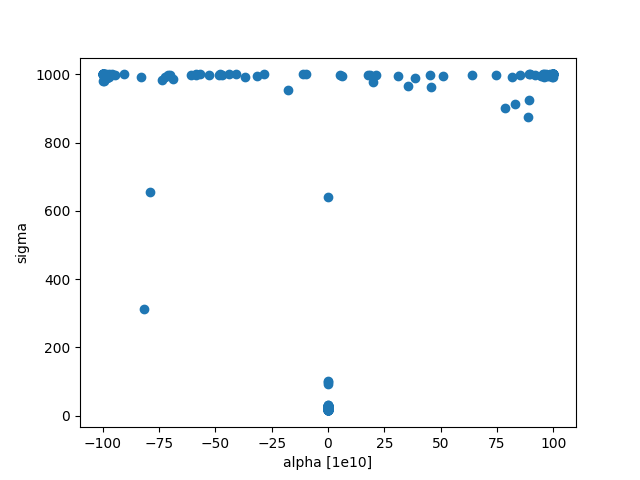

0.859

In [140]:
_,ax = plt.subplots()
ax.scatter(m_18_alpha_5, m_18_sigma_5)
ax.set(xlabel='alpha [1e10]', ylabel='sigma')
sum(np.array(m_18_sigma_5)<50)/1000

In [141]:
x_pos_5  = [np.mean(bb.x2) for bb in data_bdfs]
y_pos_5  = [np.mean(bb.y2) for bb in data_bdfs]

<IPython.core.display.Javascript object>


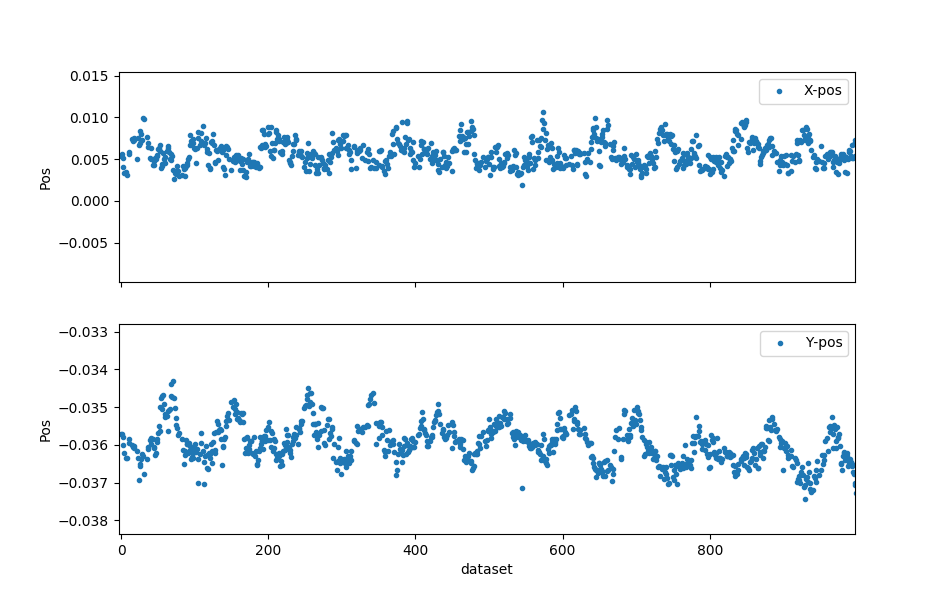

[[(-0.06, 0.1)], [(-0.06, 0.1)]]

In [152]:
_, ax = plt.subplots(2,1,figsize=(9.5,6), sharex=True)
ax[0].plot(range(len(m_18_alpha_3)),np.array(x_pos_5),'.', label=r'X-pos')
ax[0].set(ylabel=r'Pos')
ax[0].legend()

ax[1].plot(range(len(m_18_alpha_3)),np.array(y_pos_5),'.', label=r'Y-pos')
ax[1].set(xlabel='dataset', ylabel=r'Pos')
ax[1].legend()

[a.set(ylim=(-0.06,0.1)) for a in ax]

<IPython.core.display.Javascript object>


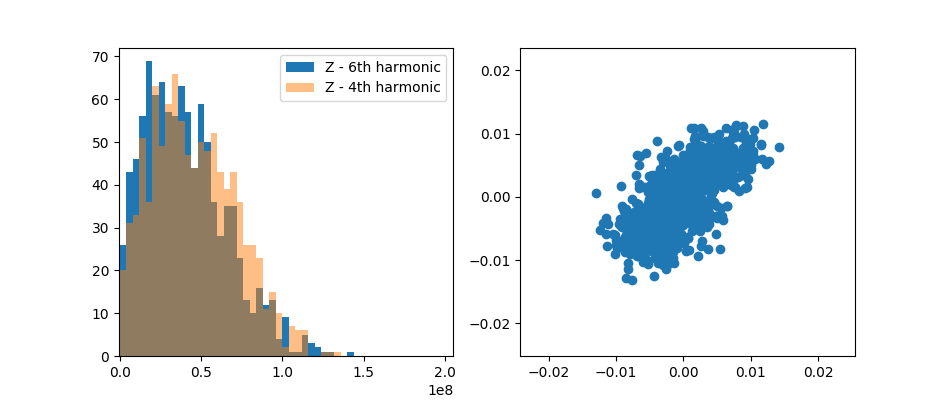

6th hsrmonic mean:  -0.0003798533920003564  error:  8.057684669983258e-05
12Hz mean:  -0.00047183749389132857  error:  8.177043140850047e-05


In [178]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].hist(np.abs(m_18_alpha_3)*1e10, range=(-0,0.02*1e10), bins=50, label=r'Z - 6th harmonic')
ax[0].hist(np.abs(m_12_alpha_3)*1e10, range=(-0,0.02*1e10), bins=50, alpha=0.5, label=r'Z - 4th harmonic')
ax[0].legend()
ax[1].scatter((m_18_alpha_3),(m_12_alpha_3))
print('6th hsrmonic mean: ',np.mean(m_18_alpha_3), ' error: ', np.std(np.abs(m_18_alpha_3))/np.sqrt(1000))
print('12Hz mean: ',np.mean(m_12_alpha_3), ' error: ', np.std(np.abs(m_12_alpha_3))/np.sqrt(1000))

In [ ]:
דגדגדגדג